<a href="https://colab.research.google.com/github/GopiMindgloer/Machine_Learning/blob/master/Bigmart_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bigmart Sales Prediction

In [0]:
#importing the required packages
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

In [0]:
#getting the dataset
from google.colab import files
files.upload()

##Exploratory Data Analysis

In [0]:
#creating dataframes
df1 = pd.read_csv('Train.csv')
df2 = pd.read_csv('Test.csv')
df1['source'] = 'train'
df2['source'] = 'test'

In [145]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
source                       5681 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 532.7+ KB


In [0]:
#Combining the test and train dataset
dataset = pd.concat([df1,df2],ignore_index = True) 

In [7]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [9]:
dataset.tail()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
14199,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1
14200,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2
14201,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.0,2002,OUT045,Tier 2,NaN,Supermarket Type1
14202,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.3,2007,OUT017,Tier 2,NaN,Supermarket Type1
14203,Regular,FDU37,79.7960,NaN,Canned,0.104720,9.5,2002,OUT045,Tier 2,NaN,Supermarket Type1


In [11]:
#Checking for missing data points
dataset.apply(lambda x: sum(x.isnull())) # or dataset.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

5681 missing outlet sales is due to the test dataset which we have to find. So we need to either eliminate or impute the missing data in outlet size and item weight

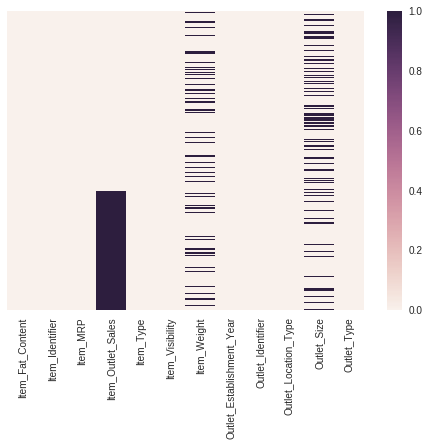

In [12]:
#Visually representing the missing data
sns.heatmap(dataset.isnull(), yticklabels = False)
plt.show()

In [13]:
#Numerical Variable Exploration
dataset.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


Inference :
I couldn't infer anything useful since this is my first time.

In [15]:
#Categorical Variables Exploration
dataset.apply(lambda x : len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
dtype: int64

Inference : There are 10 outlets which are of 3 types.  16 different types of items are sold. Outlets' size is of 4 types.

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


**It will be useful if we find the frequency of items sold in each category of item_Type,Outlet_Location_Type, Outlet_Size, Outlet_Type,Item_Fat_Content.** All these variables have the same dtype of **object**.

In [114]:
#creating an array of only variables whose dtype is object
object_variables = [x for x in dataset.dtypes.index if dataset.dtypes[x] == 'object' ]
object_variables

['Item_Fat_Content',
 'Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'source']

From this we don't need Item_ Identifier, Outlet_Identifier.

In [115]:
#removing unwanted variables
variables_needed = [x for x in object_variables if x not in ['Item_Identifier','Outlet_Identifier']]
variables_needed

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'source']

In [0]:
#calculating the frequency of each category in each variables
for item in variables_needed :
  print('Frequency of categories in the variable %s' %item)
  print(dataset[item].value_counts())

##Data Cleaning

We found that there are many missing datapoints in item_weight and outlet_size. So we need to impute the missing values

In [117]:
#Imputing missing item_weight_values with average values in each category
avg_item_weight = dataset.pivot_table(values='Item_Weight', index='Item_Identifier')
avg_item_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
DRB24,8.785
DRB25,12.300
DRB48,16.750
DRC01,5.920


In [0]:
def impute_weight(columns):
  identifier = columns[1]
  weight = columns[0]
  if pd.isnull(weight):
    return avg_item_weight['Item_Weight'][avg_item_weight.index == identifier]
  else :
    return weight

In [119]:
print ('Orignal #missing: %d'%sum(dataset['Item_Weight'].isnull()))
dataset['Item_Weight'] = dataset[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(dataset['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [120]:
outlet_size_mode = dataset.pivot_table(values='Outlet_Size', columns = 'Outlet_Type',aggfunc=lambda x: x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [0]:
def impute_size_mode(cols):
  Size = cols[0]
  Type = cols[1]
  if pd.isnull(Size):
    return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
  else:
    return Size


In [122]:
print ('Orignal #missing: %d'%sum(dataset['Outlet_Size'].isnull()))
dataset['Outlet_Size'] = dataset[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(dataset['Outlet_Size'].isnull()))


Orignal #missing: 4016
Final #missing: 0


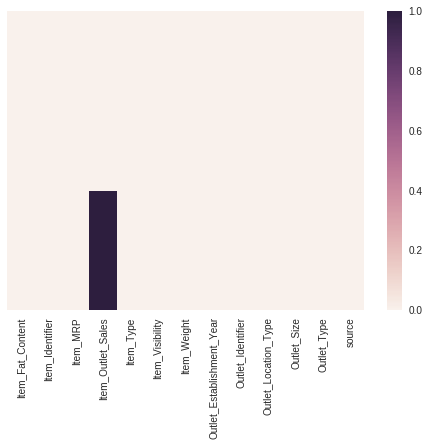

In [123]:
sns.heatmap(dataset.isnull(),yticklabels = False)
plt.show()

In [124]:
dataset.pivot_table(values = 'Item_Outlet_Sales',index = 'Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


There's much difference in average sales so we need not modify anything.

In [125]:
visibility_item_avg = dataset.pivot_table(values='Item_Visibility',index='Item_Identifier')
visibility_item_avg.describe()

,Item_Visibility
count,1559.000000
mean,0.065690
std,0.044016
min,0.003895
25%,0.030478
50%,0.055125
75%,0.091590
max,0.211315


In [0]:
def impute_visibility_mean(cols):
  visibility = cols[0]
  item = cols[1]
  if visibility == 0:
    return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
  else:
    return visibility

In [127]:
print ('Original #zeros: %d'%sum(dataset['Item_Visibility'] == 0))
dataset['Item_Visibility'] = dataset[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(dataset['Item_Visibility'] == 0))

Original #zeros: 879
Final #zeros: 0


In [0]:
dataset['Item_Visibility_MeanRatio'] = dataset.apply(lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0],axis=1).astype(float)

In [0]:
dataset['Item_Type_New'] = dataset['Item_Identifier'].apply(lambda x: x[0:2])

In [0]:
dataset['Item_Type_New'] = dataset['Item_Type_New'].map({'FD': 'Food',
'DR': 'Drinks',
'NC': 'Non-Consumable'})

In [131]:
dataset['Item_Type_New'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_New, dtype: int64

In [132]:
dataset['Outlet_Years'] = 2013 - dataset['Outlet_Establishment_Year']
dataset['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [133]:
print('Original Categories:')
print(dataset['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


In [134]:
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({'LF':'Low Fat','low fat': 'Low Fat', 'reg':'Regular'})
dataset['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [0]:
dataset.loc[dataset['Item_Type_New'] == 'Non-Consumable','Item_Fat_Content'] = 'Non-Edible'

In [136]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_New,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.931078,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,0.933420,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.960069,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,1.000000,Food,15
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,1.000000,Non-Consumable,26


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
dataset['Outlet'] = le.fit_transform(dataset['Outlet_Identifier'])

In [0]:
cat_var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_New','Outlet_Type','Outlet']
le = LabelEncoder()
for i in cat_var_mod:
  dataset[i] = le.fit_transform(dataset[i])

In [0]:
dataset = pd.get_dummies(dataset, columns = cat_var_mod)

In [0]:
dataset.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [142]:
dataset.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Visibility              float64
Item_Weight                  float64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Item_Type_New_0                uint8
Item_Type_New_1                uint8
Item_Type_New_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [88]:
dataset.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Item_Visibility_MeanRatio,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,0.931078,14,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,0.933420,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,0.872790,14,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,0.818182,15,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,0.750000,26,0,1,...,0,1,0,0,0,0,0,0,0,0


In [0]:
test = dataset.loc[dataset['source'] == 'test']

In [146]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 8523 to 14203
Data columns (total 35 columns):
Item_Identifier              5681 non-null object
Item_MRP                     5681 non-null float64
Item_Outlet_Sales            0 non-null float64
Item_Visibility              5681 non-null float64
Item_Weight                  5681 non-null float64
Outlet_Identifier            5681 non-null object
source                       5681 non-null object
Item_Visibility_MeanRatio    5681 non-null float64
Outlet_Years                 5681 non-null int64
Item_Fat_Content_0           5681 non-null uint8
Item_Fat_Content_1           5681 non-null uint8
Item_Fat_Content_2           5681 non-null uint8
Outlet_Location_Type_0       5681 non-null uint8
Outlet_Location_Type_1       5681 non-null uint8
Outlet_Location_Type_2       5681 non-null uint8
Outlet_Size_0                5681 non-null uint8
Outlet_Size_1                5681 non-null uint8
Outlet_Size_2                5681 non-null uin

In [0]:
train = dataset.loc[dataset['source'] == 'train']

In [0]:
train.drop(['source'],axis = 1, inplace = True)
test.drop(['source','Item_Outlet_Sales'],axis = 1, inplace = True)

In [0]:
mean_sales = train['Item_Outlet_Sales'].mean()

##Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression(normalize=True)

In [0]:
X_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
Y_train = train['Item_Outlet_Sales']
X_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

In [156]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
lr_pred = lr.predict(X_test)

In [158]:
lr_accuracy = round(lr.score(X_train,Y_train) * 100,2)
lr_accuracy

56.35

##Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
tree = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)

In [162]:
tree.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
tree_pred = tree.predict(X_test)

In [164]:
tree_accuracy = round(tree.score(X_train,Y_train),2)
tree_accuracy

0.62